# GGS Data Visualization
Author: Matthew Learn (matt.learn@marine.rutgers.edu)<br><br>
Jupyter Notebook meant for visualizing Glider Guidance System (GGS) products.

In [1]:
from models import *
from functions import *
from plotting import *

In [2]:
dates = ('2024-11-20', '2024-11-20')
depth = 1000
lon_min = -79
lon_max = -50
lat_min = 34
lat_max = 45

extent = (lat_min, lon_min, lat_max, lon_max)

density = 5
scalar = 4

Load and process data.

In [3]:
cmems = CMEMS()
cmems.load()
cmems.subset(dates, extent, depth)
subset = cmems.subset_data.isel(time=0)
interp = interpolate_depth(subset)
cmems_ds = calculate_magnitude(interp)
cmems_dac = depth_average(cmems_ds)

espc = ESPC()
espc.load()
espc.subset(dates, extent, depth)
subset = espc.subset_data.isel(time=0)
interp = interpolate_depth(subset)
espc_ds = calculate_magnitude(interp)
espc_dac = depth_average(espc_ds)
espc_dac = regrid_ds(espc_dac, cmems_dac)

rtofs_e = RTOFS()
rtofs_e.load('east')
rtofs_e.subset(dates, extent, depth)
subset = rtofs_e.subset_data.isel(time=0)
interp = interpolate_depth(subset)
rtofs_e_ds = calculate_magnitude(interp)
rtofs_e_dac = depth_average(rtofs_e_ds)
rtofs_e_dac = regrid_ds(rtofs_e_dac, cmems_dac)

rtofs_p = RTOFS()
rtofs_p.load('parallel')
rtofs_p.subset(dates, extent, depth)
subset = rtofs_p.subset_data.isel(time=0)
interp = interpolate_depth(subset)
rtofs_p_ds = calculate_magnitude(interp)
rtofs_p_dac = depth_average(rtofs_p_ds)
rtofs_p_dac = regrid_ds(rtofs_p_dac, cmems_dac)

Loading CMEMS data...
Start time (UTC): 2024-11-21 19:38:40.454598+00:00


INFO - 2024-11-21T19:38:40Z - Dataset version was not specified, the latest one was selected: "202406"
INFO - 2024-11-21T19:38:40Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-11-21T19:38:43Z - Service was not specified, the default one was selected: "arco-geo-series"


Done.
End time (UTC): 2024-11-21 19:38:48.800644+00:00
Runtime: 0:00:08.346046

CMEMS: Subsetted data.

CMEMS: Interpolating depth...
Start time (UTC): 2024-11-21 19:38:48.958305+00:00
Done.
End time (UTC): 2024-11-21 19:39:15.151470+00:00
Runtime: 0:00:26.193165

CMEMS: Calculating magnitude...
Start time (UTC): 2024-11-21 19:39:15.151470+00:00
Done.
End time (UTC): 2024-11-21 19:39:15.157990+00:00
Runtime: 0:00:00.006520

CMEMS: Depth averaging...
Start time (UTC): 2024-11-21 19:39:15.157990+00:00
Done.
End time (UTC): 2024-11-21 19:39:15.157990+00:00
Runtime: 0:00:00

Loading ESPC data...
Start time (UTC): 2024-11-21 19:39:15.157990+00:00
Done.
End time (UTC): 2024-11-21 19:39:15.627608+00:00
Runtime: 0:00:00.469618

ESPC: Subsetted data.

ESPC: Interpolating depth...
Start time (UTC): 2024-11-21 19:39:15.637023+00:00
Done.
End time (UTC): 2024-11-21 19:39:24.369985+00:00
Runtime: 0:00:08.732962

ESPC: Calculating magnitude...
Start time (UTC): 2024-11-21 19:39:24.369985+00:00
Done.

In [4]:
cmems_min_date = cmems.raw_data.time.min().dt.strftime("%Y-%m-%d-%H").values
cmems_max_date = cmems.raw_data.time.max().dt.strftime("%Y-%m-%d-%H").values
espc_min_date = espc.raw_data.time.min().dt.strftime("%Y-%m-%d-%H").values
espc_max_date = espc.raw_data.time.max().dt.strftime("%Y-%m-%d-%H").values
rtofs_e_min_date = rtofs_e.raw_data.time.min().dt.strftime("%Y-%m-%d-%H").values
rtofs_e_max_date = rtofs_e.raw_data.time.max().dt.strftime("%Y-%m-%d-%H").values
rtofs_p_min_date = rtofs_p.raw_data.time.min().dt.strftime("%Y-%m-%d-%H").values
rtofs_p_max_date = rtofs_p.raw_data.time.max().dt.strftime("%Y-%m-%d-%H").values

print(f"CMEMS min date: {cmems_min_date}")
print(f"CMEMS max date: {cmems_max_date}\n")
print(f"ESPC min date: {espc_min_date}")
print(f"ESPC max date: {espc_max_date}\n")
print(f"RTOFS (East Coast) min date: {rtofs_e_min_date}")
print(f"RTOFS (East Coast) max date: {rtofs_e_max_date}\n")
print(f"RTOFS (Parallel) min date: {rtofs_p_min_date}")
print(f"RTOFS (Parallel) max date: {rtofs_p_max_date}")

CMEMS min date: 2022-06-01-00
CMEMS max date: 2024-12-01-00

ESPC min date: 2024-11-11-12
ESPC max date: 2024-11-27-12

RTOFS (East Coast) min date: 2019-07-17-06
RTOFS (East Coast) max date: 2024-11-22-00

RTOFS (Parallel) min date: 2024-01-28-06
RTOFS (Parallel) max date: 2024-11-22-00


All Models Averaged: Plotting magnitudes...
Start time (UTC): 2024-11-21 19:39:49.149131+00:00
End time (UTC): 2024-11-21 19:40:10.283582+00:00
Runtime: 0:00:21.134451



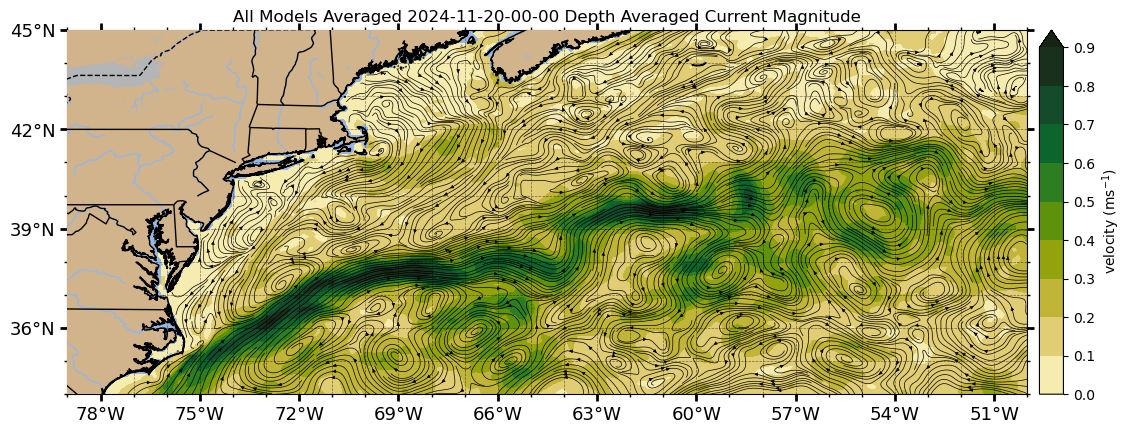

In [5]:
mean_dac = (cmems_dac + espc_dac + rtofs_e_dac + rtofs_p_dac) / 4
mean_dac.attrs["model"] = "All Models Averaged"
plot_magnitude(mean_dac, extent, streamlines=True, density=8)
plt.savefig('plots/blendedmag.png', bbox_inches='tight', dpi=900)

Mean Difference: Plotting magnitudes...
Start time (UTC): 2024-11-21 20:07:35.502712+00:00
End time (UTC): 2024-11-21 20:07:40.134528+00:00
Runtime: 0:00:04.631816



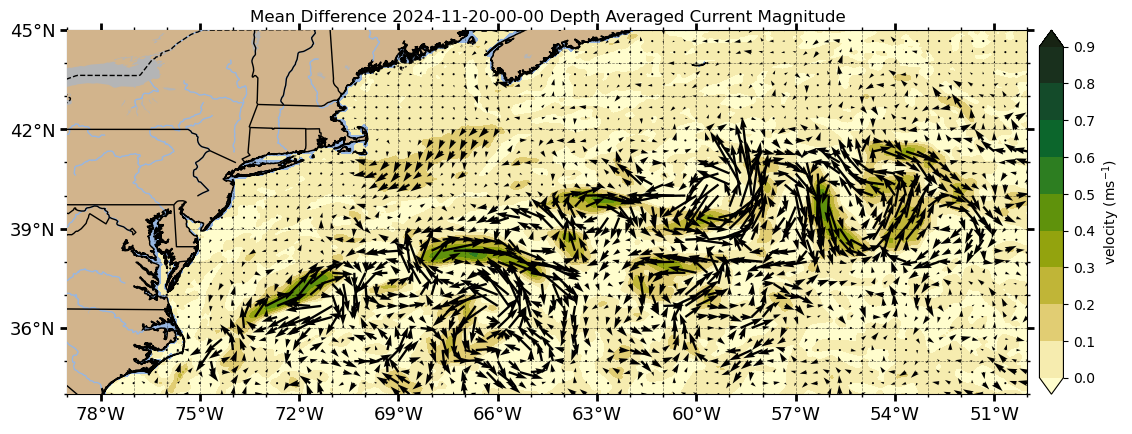

In [13]:
diff1 = cmems_dac - espc_dac
diff2 = cmems_dac - rtofs_e_dac
diff3 = cmems_dac - rtofs_p_dac
diff5 = espc_dac - rtofs_e_dac
diff6 = espc_dac - rtofs_p_dac
diff7 = rtofs_e_dac - rtofs_p_dac

avg = (diff1 + diff2 + diff3 + diff5 + diff6 + diff7) / 6
avg.attrs["model"] = "Mean Difference"
plot_magnitude(avg, extent, extend="both", quiver=True, scalar=4)

Mean Difference: Plotting Thresholds...
Start time (UTC): 2024-11-21 20:04:54.716172+00:00
End time (UTC): 2024-11-21 20:05:25.746699+00:00
Runtime: 0:00:31.030527



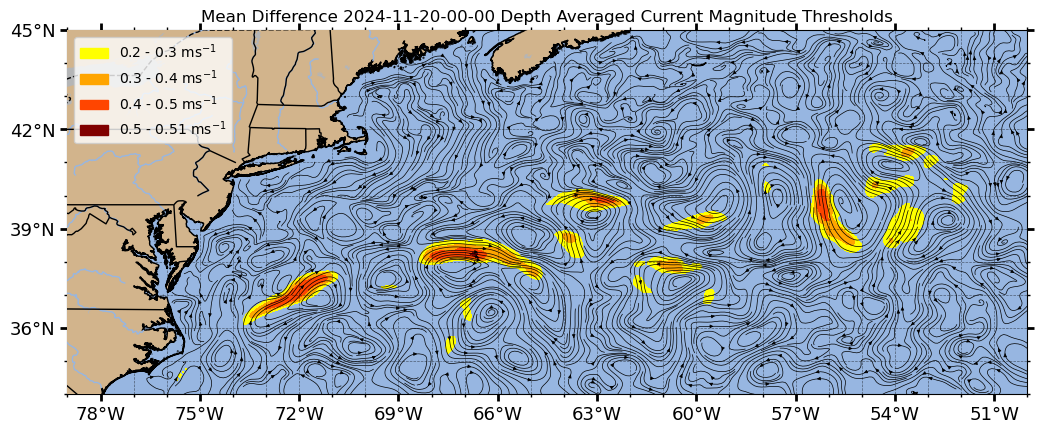

In [11]:
plot_threshold(avg, extent, streamlines=True, density=8)

In [7]:
cmems_dac

<xarray.Dataset> Size: 1MB
Dimensions:    (lat: 133, lon: 349)
Coordinates:
  * lat        (lat) float32 532B 34.0 34.08 34.17 34.25 ... 44.83 44.92 45.0
  * lon        (lon) float32 1kB -79.0 -78.92 -78.83 ... -50.17 -50.08 -50.0
    time       datetime64[ns] 8B 2024-11-20
Data variables:
    u          (lat, lon) float64 371kB dask.array<chunksize=(133, 349), meta=np.ndarray>
    v          (lat, lon) float64 371kB dask.array<chunksize=(133, 349), meta=np.ndarray>
    magnitude  (lat, lon) float64 371kB dask.array<chunksize=(133, 349), meta=np.ndarray>
Attributes:
    model:    CMEMS

In [8]:
std = np.std([cmems_dac, rtofs_e_dac, rtofs_p_dac], axis=0)

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_dataarray()` method.

RTOFS (East Coast): Plotting Thresholds...
Start time (UTC): 2024-11-21 02:22:36.595645+00:00
End time (UTC): 2024-11-21 02:22:38.359252+00:00
Runtime: 0:00:01.763607



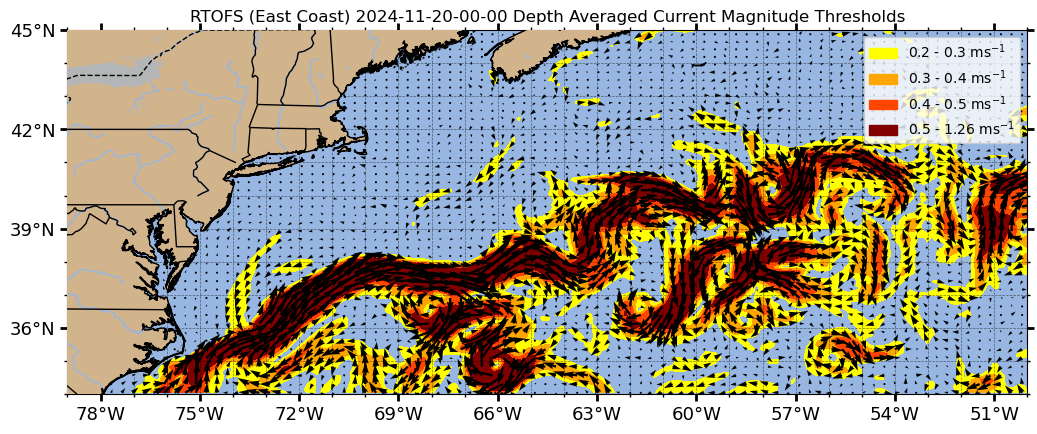

In [ ]:
# plot_threshold(rtofs_e_dac, extent, quiver=True, scalar=scalar)
# plt.savefig('plots/0_rtofs_eHIREZ.png', bbox_inches='tight', dpi=900)

RTOFS (East Coast): Plotting Thresholds...
Start time (UTC): 2024-11-21 02:26:59.382287+00:00
End time (UTC): 2024-11-21 02:27:31.423141+00:00
Runtime: 0:00:32.040854



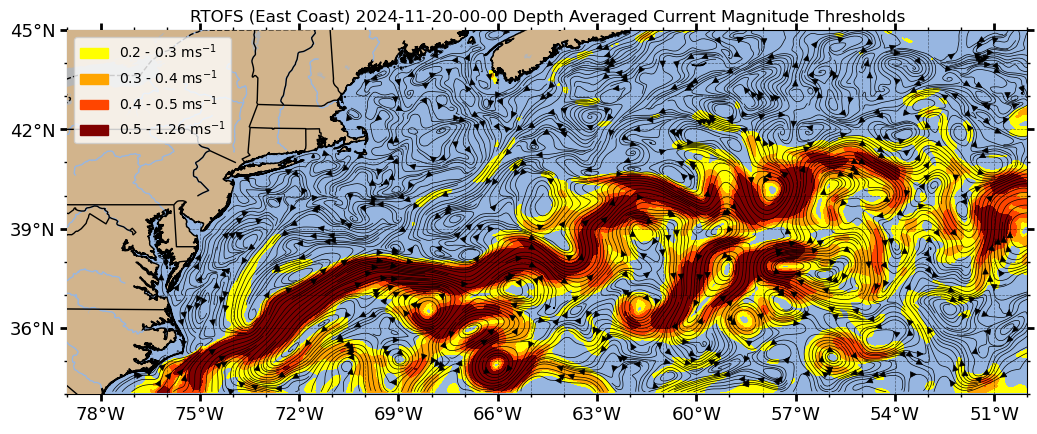

In [ ]:
# plot_threshold(rtofs_e_dac, extent, streamlines=True, density=10)
# plt.savefig('plots/1_rtofs_eHIREZ.png', bbox_inches='tight', dpi=900)